# Logistic Regression (MNIST)

- 60k : training images
- 10k : test images

In [1]:
from sklearn.datasets import load_digits  # MNIST

import matplotlib.pyplot as plt 


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import seaborn as sn

# Load Data

In [2]:
# Loading the dataset
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# Plot some data

<Figure size 640x480 with 0 Axes>

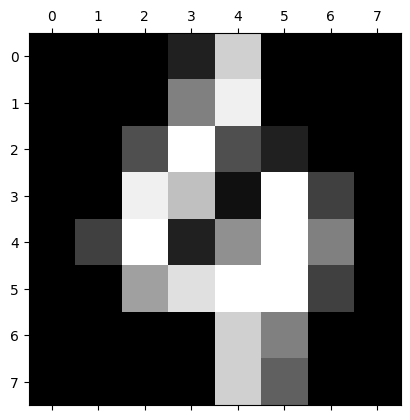

In [4]:
IMAGE_INDEX = 100 # show me the image number 100

plt.gray() 

plt.matshow(digits.images[IMAGE_INDEX])

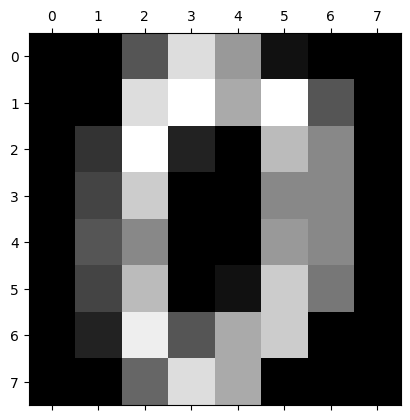

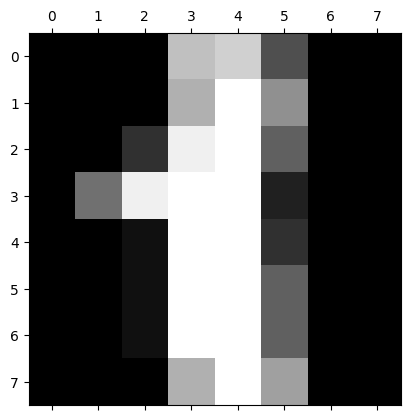

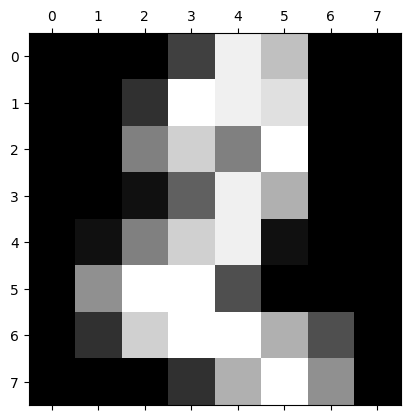

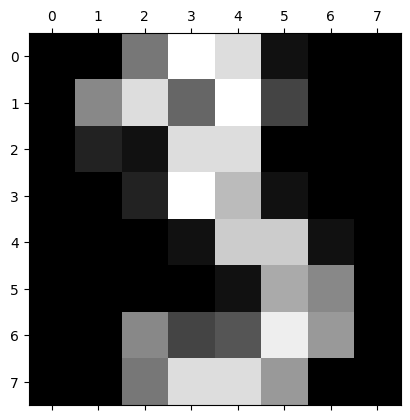

In [5]:
for i in range(4):
    plt.matshow(digits.images[i])


In [6]:
# The label of the image
digits.target[IMAGE_INDEX]

4

In [7]:
# the pixel values of the image
digits.data[IMAGE_INDEX]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

# Split the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data  ,  digits.target , test_size= 0.2)

# Build and Train the model

In [9]:
model = LogisticRegression()

model.fit(X_train, y_train)

c:\Python\Python3114\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predictions

In [10]:
model.predict(digits.data[0:4])

array([0, 1, 2, 3])

# Scoring

In [11]:
model.score(X_test, y_test)

0.9666666666666667

# Confusion Matrix 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [12]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

In [13]:
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  1],
       [ 0,  2,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

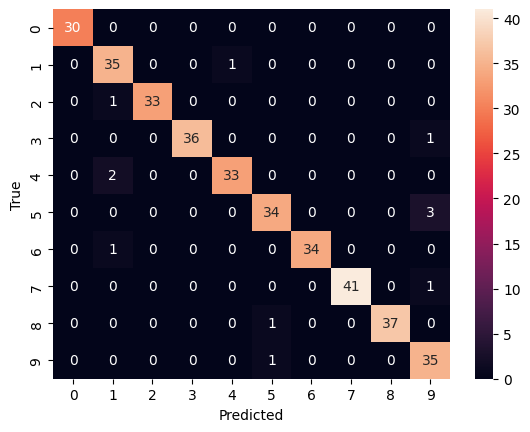

In [14]:
sn.heatmap(cm, annot=True)

# due to cm from sklearn -> xlabel is the predicted and y_label is the True
plt.xlabel("Predicted") 
plt.ylabel("True")

# Alternative to display the Confusion Matrix using Scikit-Learn

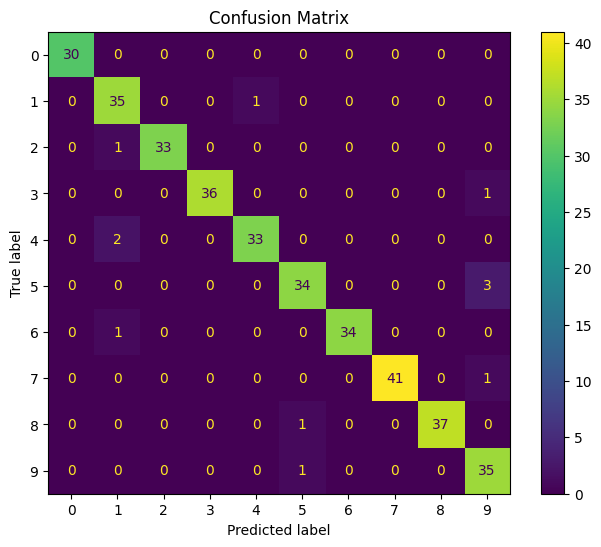

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)